# Analysis of Spatial Transcriptomic Data.

Using Spatial Visium Data from Mayr et al. all files are downloaded from: https://zenodo.org/records/10782711. 

Code in this notebook contains modifications and additions to code originally established in the published zenodo above.


#### import all required modules (installed independantly)

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (6, 6)
from matplotlib import colors
colorsComb = np.vstack([plt.cm.Reds(np.linspace(0, 1, 128)), plt.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


Load adata from zenodo and explore its content

In [3]:
adata = sc.read_h5ad(filename="data/adata_vis_human_spatial_paper.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 57787 × 12486
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_25', 'sampleID', 'treatment', 'VisiumSlides', 'technology', 'patient', 'AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS', 'Androgen', 'EGFRsignaling', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'p53', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'mean_nUMI_fa

In [ ]:
# function unchanged from originial published code.
def select_slide(adata, s, s_col='sample'):
    r""" This function selects the data for one slide from the spatial anndata object.
    :param adata: Anndata object with multiple spatial experiments
    :param s: name of selected experiment
    :param s_col: column in adata.obs listing experiment name for each location
    """
    slide = adata[adata.obs[s_col].isin([s]), :]
    s_keys = list(slide.uns['spatial'].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]

    slide.uns['spatial'] = {s_spatial: slide.uns['spatial'][s_spatial]}

    return slide

In [ ]:
slides = []

[]

In [8]:
adata_vis = adata.copy()

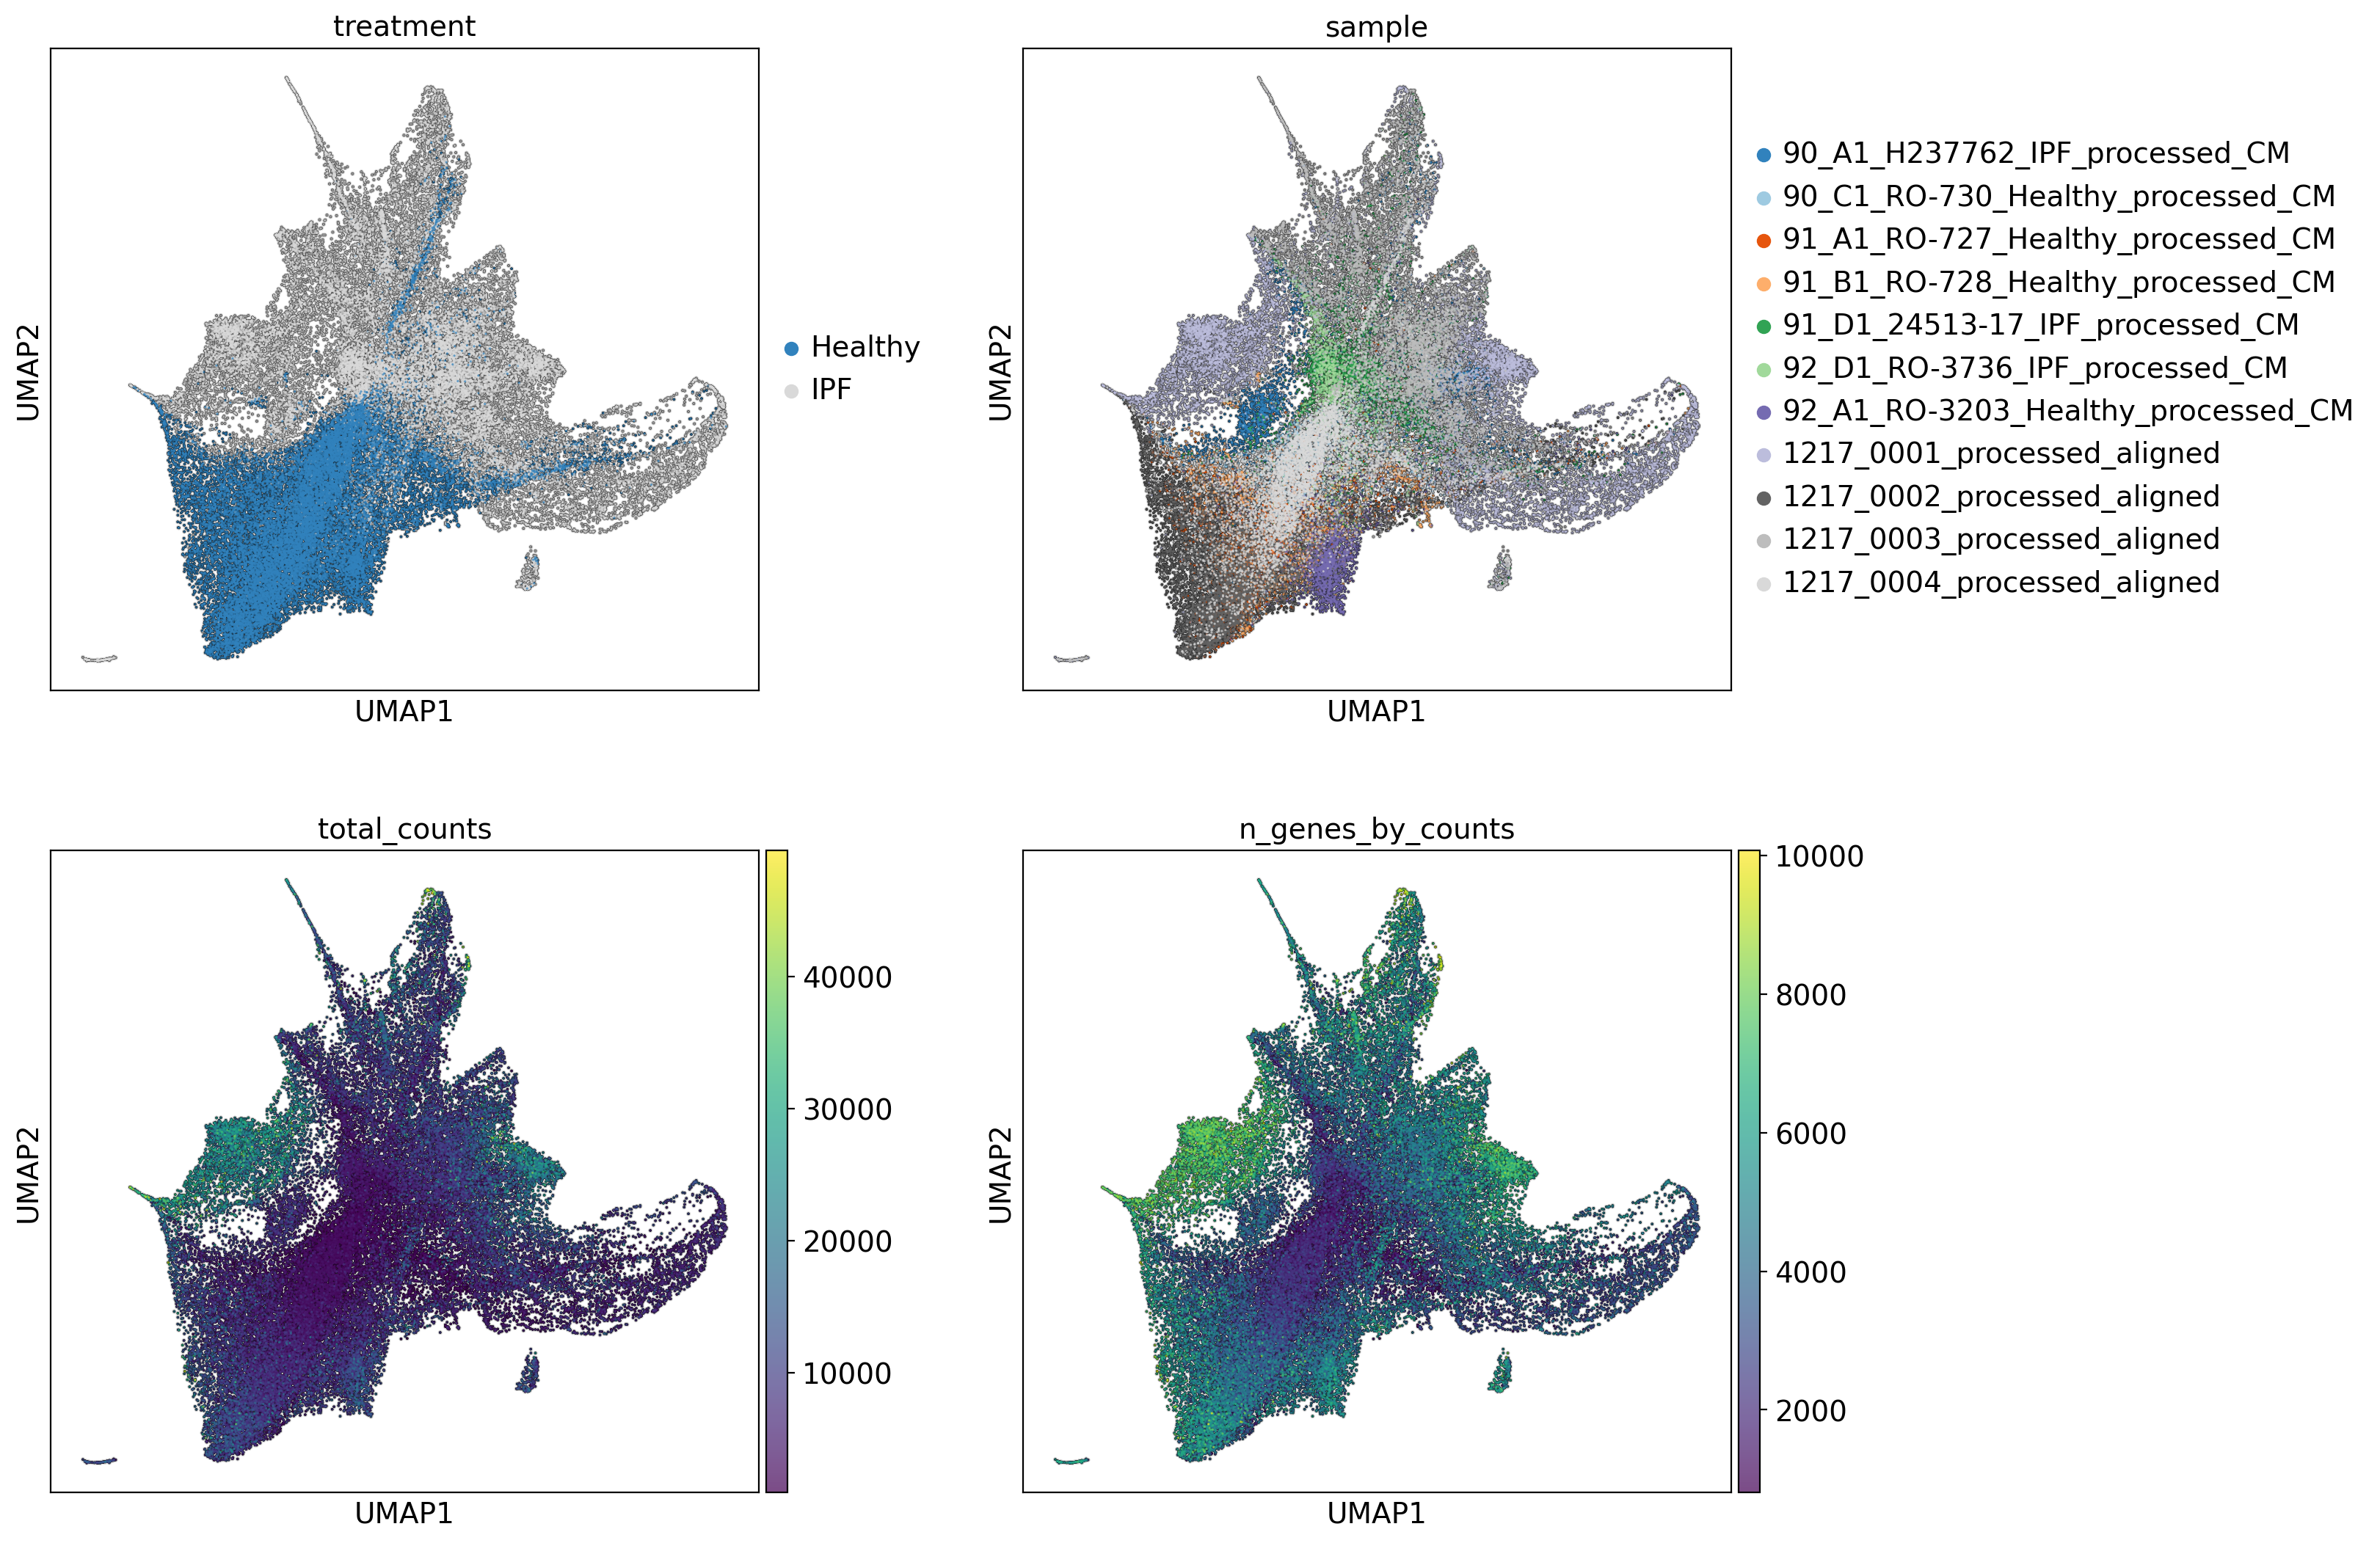

In [ ]:
# expolore the data. 
sc.set_figure_params(dpi=100, figsize=(6,6))
sc.pl.umap(adata_vis, color=["treatment","sample", "total_counts","n_genes_by_counts"], palette="tab20c",
                   add_outline=True, ncols=2, legend_fontoutline=2, legend_fontsize=14, wspace=0.25,
                   outline_width=(0.4, 0.1), outline_color=('lightgray', 'black'), size=5)

In [10]:
adata_vis.var

feature_types  genome    SYMBOL  n_cells  highly_variable  \
TSPAN6    Gene Expression  GRCh38    TSPAN6     9697             True   
TNMD      Gene Expression  GRCh38      TNMD      917             True   
DPM1      Gene Expression  GRCh38      DPM1    21814             True   
SCYL3     Gene Expression  GRCh38     SCYL3     9699            False   
C1orf112  Gene Expression  GRCh38  C1orf112     5485            False   
...                   ...     ...       ...      ...              ...   
DDX52     Gene Expression  GRCh38     DDX52     8801            False   
MYO19     Gene Expression  GRCh38     MYO19    13509            False   
GGNBP2    Gene Expression  GRCh38    GGNBP2    32998            False   
ACACA     Gene Expression  GRCh38     ACACA    21754            False   
HIST1H3H  Gene Expression  GRCh38  HIST1H3H     5414             True   

          highly_variable_rank     means  variances  variances_norm  \
TSPAN6                  1377.0  0.224203   0.359382        1.242877   
TNMD                    5176.0  0.016180   0.016542        0.996613   
DPM1                    5100.0  0.596518   0.938920        0.997269   
SCYL3                      NaN  0.200928   0.239332        0.932308   
C1orf112                   NaN  0.103657   0.111742        0.870819   
...                        ...       ...        ...             ...   
DDX52                      NaN  0.176147   0.201364        0.903260   
MYO19                      NaN  0.294305   0.361814        0.919510   
GGNBP2                     NaN  1.106754   1.899983        0.798478   
ACACA                      NaN  0.553325   0.774416        0.910001   
HIST1H3H                2179.0  0.113243   0.155036        1.102479   

                  ENSEMBL  
TSPAN6    ENSG00000000003  
TNMD      ENSG00000000005  
DPM1      ENSG00000000419  
SCYL3     ENSG00000000457  
C1orf112  ENSG00000000460  
...                   ...  
DDX52     ENSG00000278053  
MYO19     ENSG00000278259  
GGNBP2    ENSG00000278311  
ACACA     ENSG00000278540  
HIST1H3H  ENSG00000278828  

[12486 rows x 10 columns]

In [11]:
adata_vis.var["ENSEMBL"] = adata_vis.var.index.copy()

In [13]:
import cell2location as c2l
from cell2location.utils import select_slide

In [12]:
controls = ["90_C1_RO-730_Healthy_processed_CM","91_A1_RO-727_Healthy_processed_CM","91_B1_RO-728_Healthy_processed_CM","1217_0002_processed_aligned","92_A1_RO-3203_Healthy_processed_CM","1217_0004_processed_aligned"]
ipf_slides = ["90_A1_H237762_IPF_processed_CM","1217_0001_processed_aligned","91_D1_24513-17_IPF_processed_CM","1217_0003_processed_aligned","92_D1_RO-3736_IPF_processed_CM"]

In [ ]:
#### Define function to plot spatial and save it: Modified from original published code.
def plot_spatial_cm(adata_vis, gene,group, vmins, vcenters, vmaxs, img_keys, cmaps, palettes):
    import matplotlib.pyplot as plt
    from cell2location.utils import select_slide
    fig1, (axes) = plt.subplots(1, 6, figsize=(24,4), )
    plt.suptitle("control", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        for index, s in enumerate(controls):
            slide = select_slide(adata_vis, s)
            sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,groups=group, vmax=vmaxs, ax=axes[index], show=False,vcenter= vcenters,palette=palettes, legend_loc="on data")
    fig1.savefig("./Genes_in_All_Slides/"+gene+"_Controls.png",dpi=300)    
    fig2, (axes2) = plt.subplots(1, 5, figsize=(20,4), )
    plt.suptitle("IPF", y=1.05)
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        for index, s in enumerate(ipf_slides):
            slide = select_slide(adata_vis, s)
            sc.pl.spatial(slide, cmap=cmaps,color=gene,size=1.3,img_key=img_keys,vmin=vmins, use_raw=False,groups=group, vmax=vmaxs, ax=axes2[index], show=False,vcenter= vcenters,palette=palettes, legend_loc="on data")
    fig2.savefig("./Genes_in_All_Slides/"+gene+"_IPF.png",dpi=300)
    print(gene+" done!")

In [ ]:
#define cmap options to display the expression over the maps.
import matplotlib.colors as colors
c_low = colors.colorConverter.to_rgba('orange', alpha = 0)
c_high = colors.colorConverter.to_rgba('red',alpha = 1)
cmap_transparent = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low, c_high], 512)

c_low2 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high2 = colors.colorConverter.to_rgba('darkblue',alpha = 1)
cmap_transparent2 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low2, c_high2], 512)

c_low3 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high3 = colors.colorConverter.to_rgba('purple',alpha = 1)
cmap_transparent3 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low3, c_high3], 512)
c_low3 = colors.colorConverter.to_rgba('green', alpha = 0)
c_high4 = colors.colorConverter.to_rgba('yellow',alpha = 1)
cmap_transparent4 = colors.LinearSegmentedColormap.from_list('rb_cmap',[c_low3, c_high4], 512)

In [ ]:
#interesting_genes = ["LOX"]
interesting_genes = ["LOX", "CCN2", "CCN1", "LOXL1", "LOXL2","LOXL4", "KRT5", "KRT8", "LAMP3"]
for g in interesting_genes:
    plot_spatial_cm(adata_vis,gene=g, vmins=None, group= None, vcenters=None, vmaxs="p99.2", img_keys= "hires", cmaps=cmap_transparent3, palettes=None)

In [ ]:
# function to plot a gene of interest on a specific slide, and a map of sepcified celltypes on the same slide. 

def plot_cell_gene(gene, celltypes, visium_id):
    from cell2location.plt import plot_spatial  # type: ignore
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    sb.reset_defaults()
    slide = select_slide(adata_vis, visium_id)
   
    crop_x = [155, 1845]
    crop_y = [1725, 225]
    with mpl.rc_context({'figure.figsize': (12, 12)}):
        fig = plot_spatial(
            adata = slide,
            color=celltypes, labels= celltypes,
            img_key="hires",
            show_img = True,
            style='fast',
            max_color_quantile = 0.990,
            circle_diameter = 6,
            # this is to specific which color is used for each cell type
            reorder_cmap=[1,3,4,5,6,0,2],
            colorbar_position='top',crop_x=crop_x, crop_y=crop_y, axis_y_flipped=False, 
            colorbar_shape={'horizontal_gaps': 0.1,},colorbar_label_kw={'size': 15,},
            )
        fig.savefig("./figures/"+"-".join(celltypes+[visium_id])+".png", dpi=300)
    
    fig1, (axes) = plt.subplots(1, 1, figsize=(4,4), )
    with plt.rc_context({'axes.facecolor':  'white','figure.figsize': [4, 4]}):
        sc.pl.spatial(slide, cmap=cmap_transparent3,color=gene,size=1.3,img_key="hires",vmin=None, ax=axes, use_raw=False,groups=None, vmax="p99.2", show=False, legend_loc="on data")
    fig1.savefig("./figures/"+gene+"_"+visium_id+".png", dpi=300)    



In [ ]:
# test the code with an individual slide.
plot_cell_gene(gene="LOX", celltypes=["Aberrant basaloid", "AT2", "Basal"], visium_id="90_A1_H237762_IPF_processed_CM")

In [ ]:
for s in controls + ipf_slides:
    plot_cell_gene(gene="LOX", celltypes=["Aberrant basaloid", "AT2", "Basal"], visium_id=s)

In [33]:
adata_vis.obs["Niche_NMF"].unique()

['Fibroblast', 'Alveolar', 'SMCs_Adv_Meso', 'Macrophage_FABP4', 'Fibrotic', 'Airway', 'Immune', 'Macrophage_SPP1']
Categories (8, object): ['Airway', 'Alveolar', 'Fibroblast', 'Fibrotic', 'Immune', 'Macrophage_FABP4', 'Macrophage_SPP1', 'SMCs_Adv_Meso']

In [34]:
adata_vis.obs["Niche_NMF"] = adata_vis.obs["Niche_NMF"].replace("Macrophage_FABP4", "Alveolar Macrophage")
adata_vis.obs["Niche_NMF"] = adata_vis.obs["Niche_NMF"].replace("Macrophage_SPP1", "Airway Macrophage")


In [35]:
treatment = adata_vis.obs["treatment"].astype(str)
celltype = adata_vis.obs["Niche_NMF"].astype(str)
adata_vis.obs["treatment_celltype"] = treatment + "_" + celltype
adata_vis.obs["treatment_celltype"] = pd.Categorical(adata_vis.obs["treatment_celltype"])


In [42]:
adata_vis.obs["Niche_NMF"].astype(str).unique()

array(['Fibroblast', 'Alveolar', 'SMCs_Adv_Meso', 'Alveolar Macrophage',
       'Fibrotic', 'Airway', 'Immune', 'Airway Macrophage'], dtype=object)

In [38]:
adata_vis.obs["treatment_celltype"].astype(str).unique()

array(['IPF_Fibroblast', 'IPF_Alveolar', 'IPF_SMCs_Adv_Meso',
       'IPF_Alveolar Macrophage', 'IPF_Fibrotic', 'IPF_Airway',
       'IPF_Immune', 'IPF_Airway Macrophage', 'Healthy_Alveolar',
       'Healthy_Immune', 'Healthy_SMCs_Adv_Meso', 'Healthy_Fibroblast',
       'Healthy_Alveolar Macrophage', 'Healthy_Airway',
       'Healthy_Airway Macrophage', 'Healthy_Fibrotic'], dtype=object)

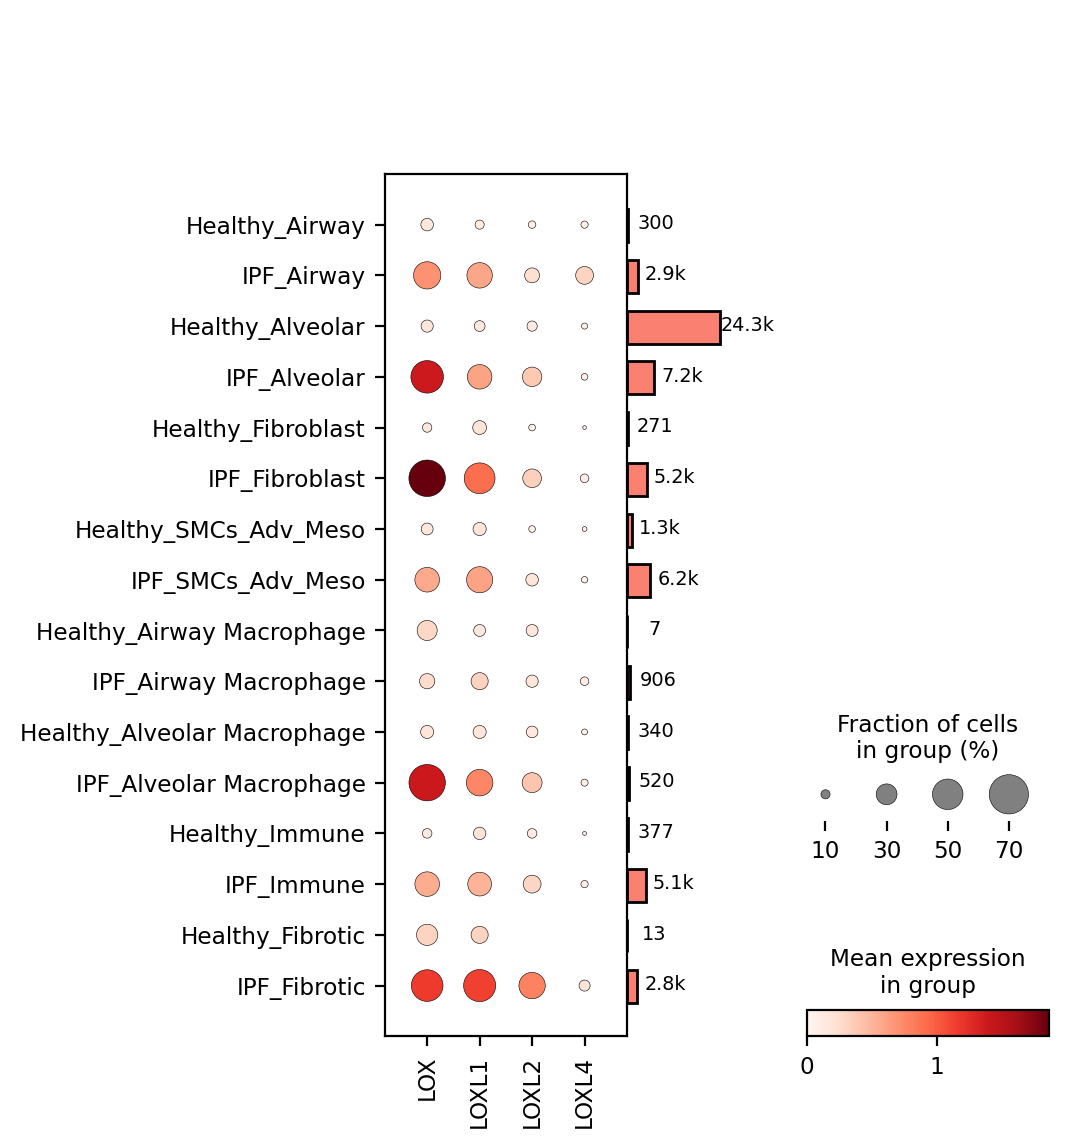

In [272]:
sc.pl.dotplot(adata_vis, var_names=["LOX", "LOXL1","LOXL2","LOXL4"], groupby="treatment_celltype",
              categories_order= ['Healthy_Airway','IPF_Airway','Healthy_Alveolar','IPF_Alveolar','Healthy_Fibroblast',
                                 'IPF_Fibroblast','Healthy_SMCs_Adv_Meso', 'IPF_SMCs_Adv_Meso','Healthy_Airway Macrophage',
                                 'IPF_Airway Macrophage', 'Healthy_Alveolar Macrophage', 'IPF_Alveolar Macrophage','Healthy_Immune',  'IPF_Immune', 
                           'Healthy_Fibrotic','IPF_Fibrotic'],
              layer="counts",
              return_fig=True).add_totals().legend(width=2).show()

In [74]:
adata_vis.obs['log1p_total_counts']

spot_id
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1    8.552753
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1    8.917043
90_A1_H237762_IPF_processed_CM_AAACAGCTTTCAGAAG-1    8.870101
90_A1_H237762_IPF_processed_CM_AAACAGGGTCTATATT-1    8.679312
90_A1_H237762_IPF_processed_CM_AAACATTTCCCGGATT-1    7.563200
                                                       ...   
1217_0004_processed_aligned_TGTTGGTGAGCGGACG-1       7.943428
1217_0004_processed_aligned_TGTTGGTGCGCACGAG-1       7.107426
1217_0004_processed_aligned_TGTTGGTGCGCTTCGC-1       8.059908
1217_0004_processed_aligned_TGTTGGTGCGGAATCA-1       8.426174
1217_0004_processed_aligned_TGTTGGTGGACTCAGG-1       8.477828
Name: log1p_total_counts, Length: 57787, dtype: float32

In [75]:
sc_celltypes = ['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast', 'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast', 'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic', 'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+', 'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+', 'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK', 'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell', 'TB-SC', 'Vein', 'pDC']

In [93]:
scData = pd.DataFrame(adata_vis.obs[["AT2", "Ionocyte"]])

In [98]:
def max_column_name(row):
    return row.idxmax()

def max_value(row):
    return row.max()

In [99]:
scData = pd.DataFrame(adata_vis.obs[sc_celltypes])
scCellType = scData.apply(max_column_name, axis=1)
scMaxValue = scData.apply(max_value, axis=1)
scData['sc_celltype'] = scCellType
scData['sc_MaxValue'] = scMaxValue

In [100]:
scData.head(2)

AT0       AT1  \
spot_id                                                                 
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.001162  0.012275   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.284728  0.797208   

                                                        AT2  \
spot_id                                                       
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.000589   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.466162   

                                                   Aberrant basaloid  \
spot_id                                                                
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1           0.002108   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1           0.047545   

                                                   Adventitial fibroblast  \
spot_id                                                                     
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1                0.203605   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1                0.064358   

                                                   Alveolar fibroblast  \
spot_id                                                                  
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1             1.176494   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1             0.038488   

                                                     Artery  B/Plasma  \
spot_id                                                                 
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.027367  0.824555   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.030167  0.072710   

                                                      Basal  Basophil/Mast  \
spot_id                                                                      
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.265306       0.053716   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.001503       0.004011   

                                                   ...        NK  \
spot_id                                            ...             
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  ...  0.014663   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  ...  0.137339   

                                                   Peribronchial fibroblast  \
spot_id                                                                       
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1                  0.043533   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1                  0.054350   

                                                   Pericyte  Smooth Muscle  \
spot_id                                                                      
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.221838       0.147173   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.763590       0.010048   

                                                     T cell     TB-SC  \
spot_id                                                                 
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.034529  0.001803   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.034626  0.005220   

                                                       Vein       pDC  \
spot_id                                                                 
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  0.106638  0.008943   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1  0.010705  0.020047   

                                                           sc_celltype  \
spot_id                                                                  
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1  Alveolar fibroblast   
90_A1_H237762_IPF_processed_CM_AAACACCAATAACTGC-1                  AT1   

                                                   sc_MaxValue  
spot_id                                                         
90_A1_H237762_IPF_processed_CM_AAACAAGTATCTCCCA-1     1.176494  
90_A1_H237762_IPF_processed_

In [101]:
adata_vis.obs['sc_celltype']=scData['sc_celltype']

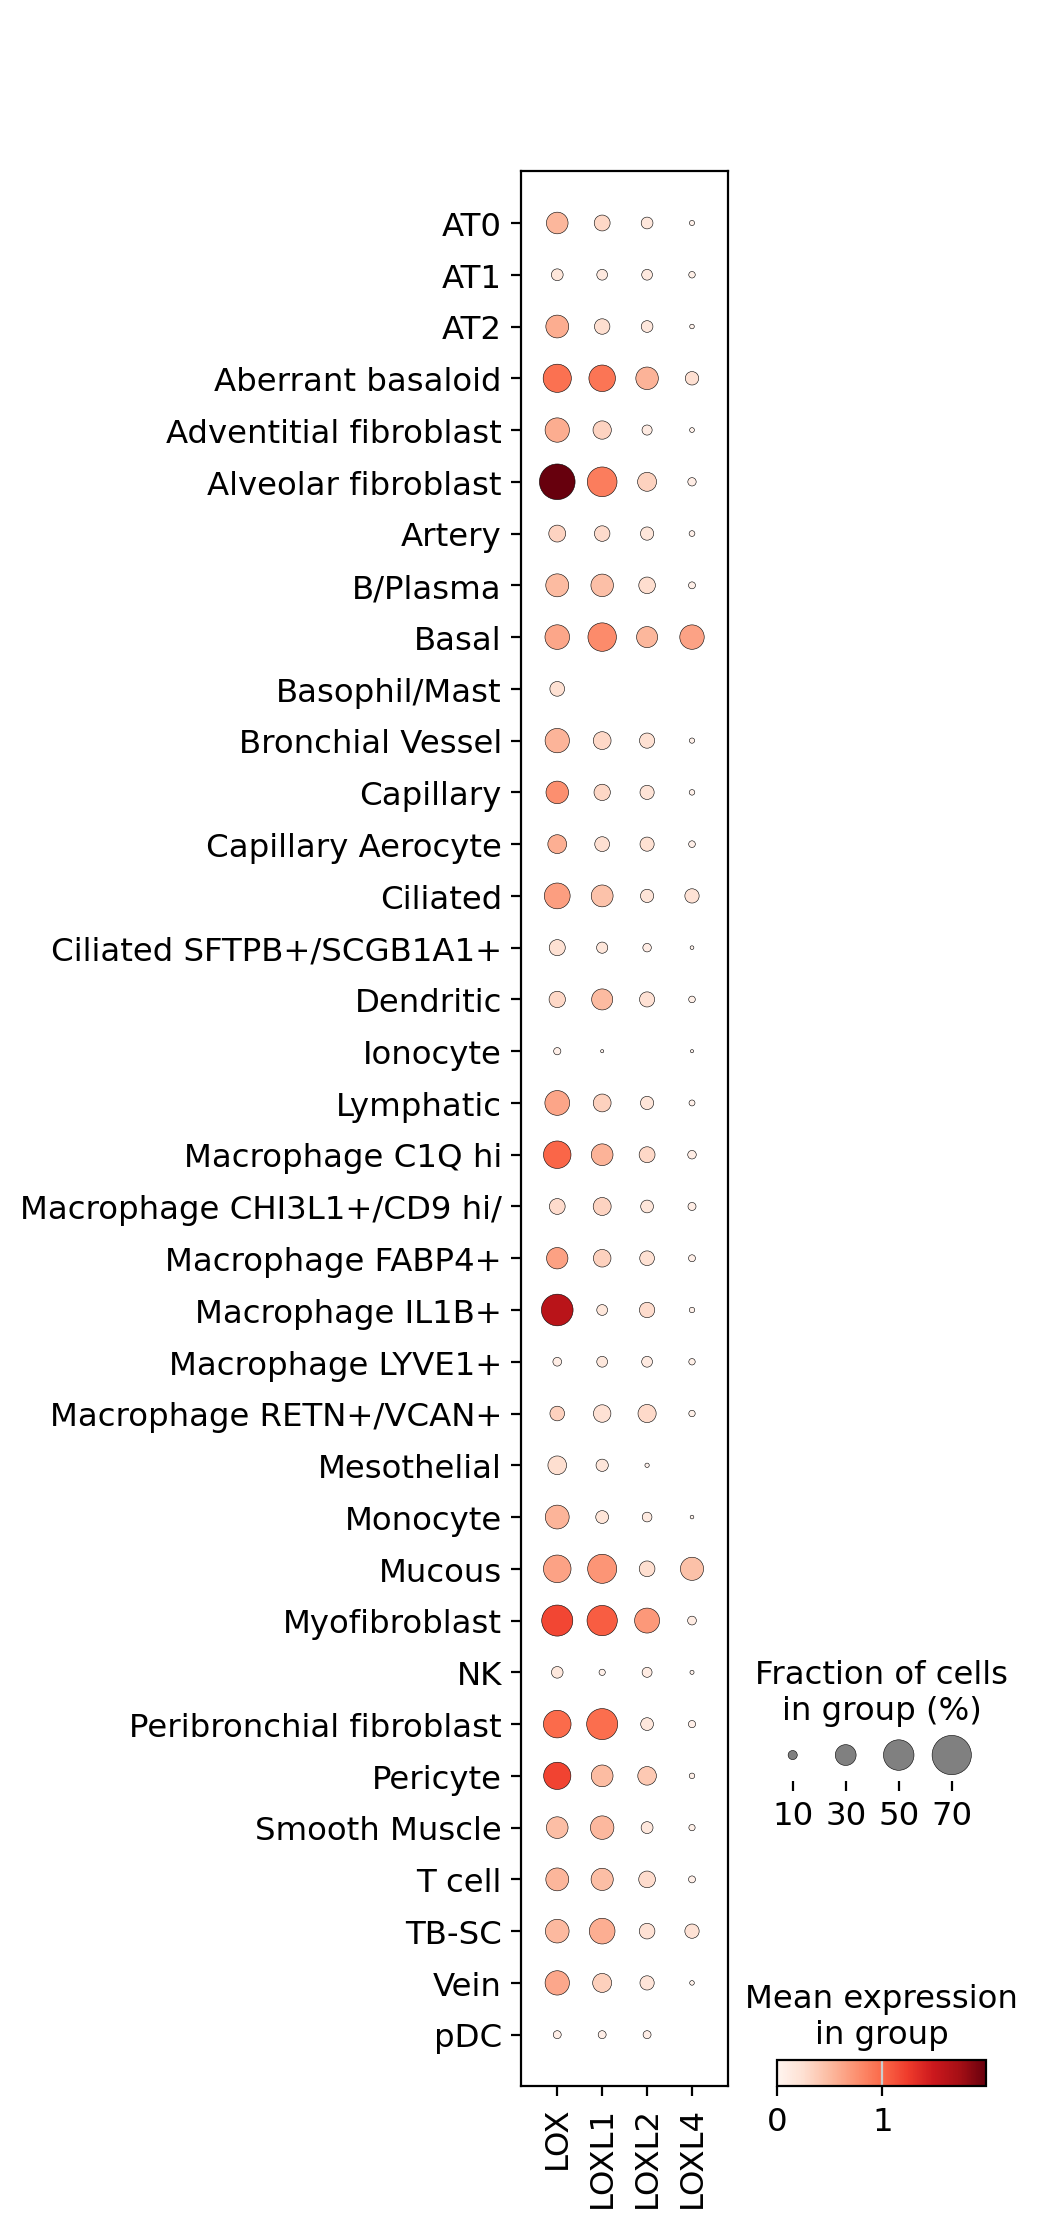

AttributeError: 'NoneType' object has no attribute 'add_totals'

In [ ]:
sc.pl.dotplot(adata_vis, var_names=["LOX", "LOXL1","LOXL2","LOXL4"], groupby="sc_celltype",
              layer="counts",
              return_fig=None,
              save="figure2.png").add_totals().legend(width=2).show()

In [108]:
treatment = adata_vis.obs["treatment"].astype(str)
sc_celltype = adata_vis.obs["sc_celltype"].astype(str)
adata_vis.obs["treatment_sc_celltype"] =   sc_celltype +"_" + treatment
adata_vis.obs["treatment_sc_celltype"] = pd.Categorical(adata_vis.obs["treatment_sc_celltype"])


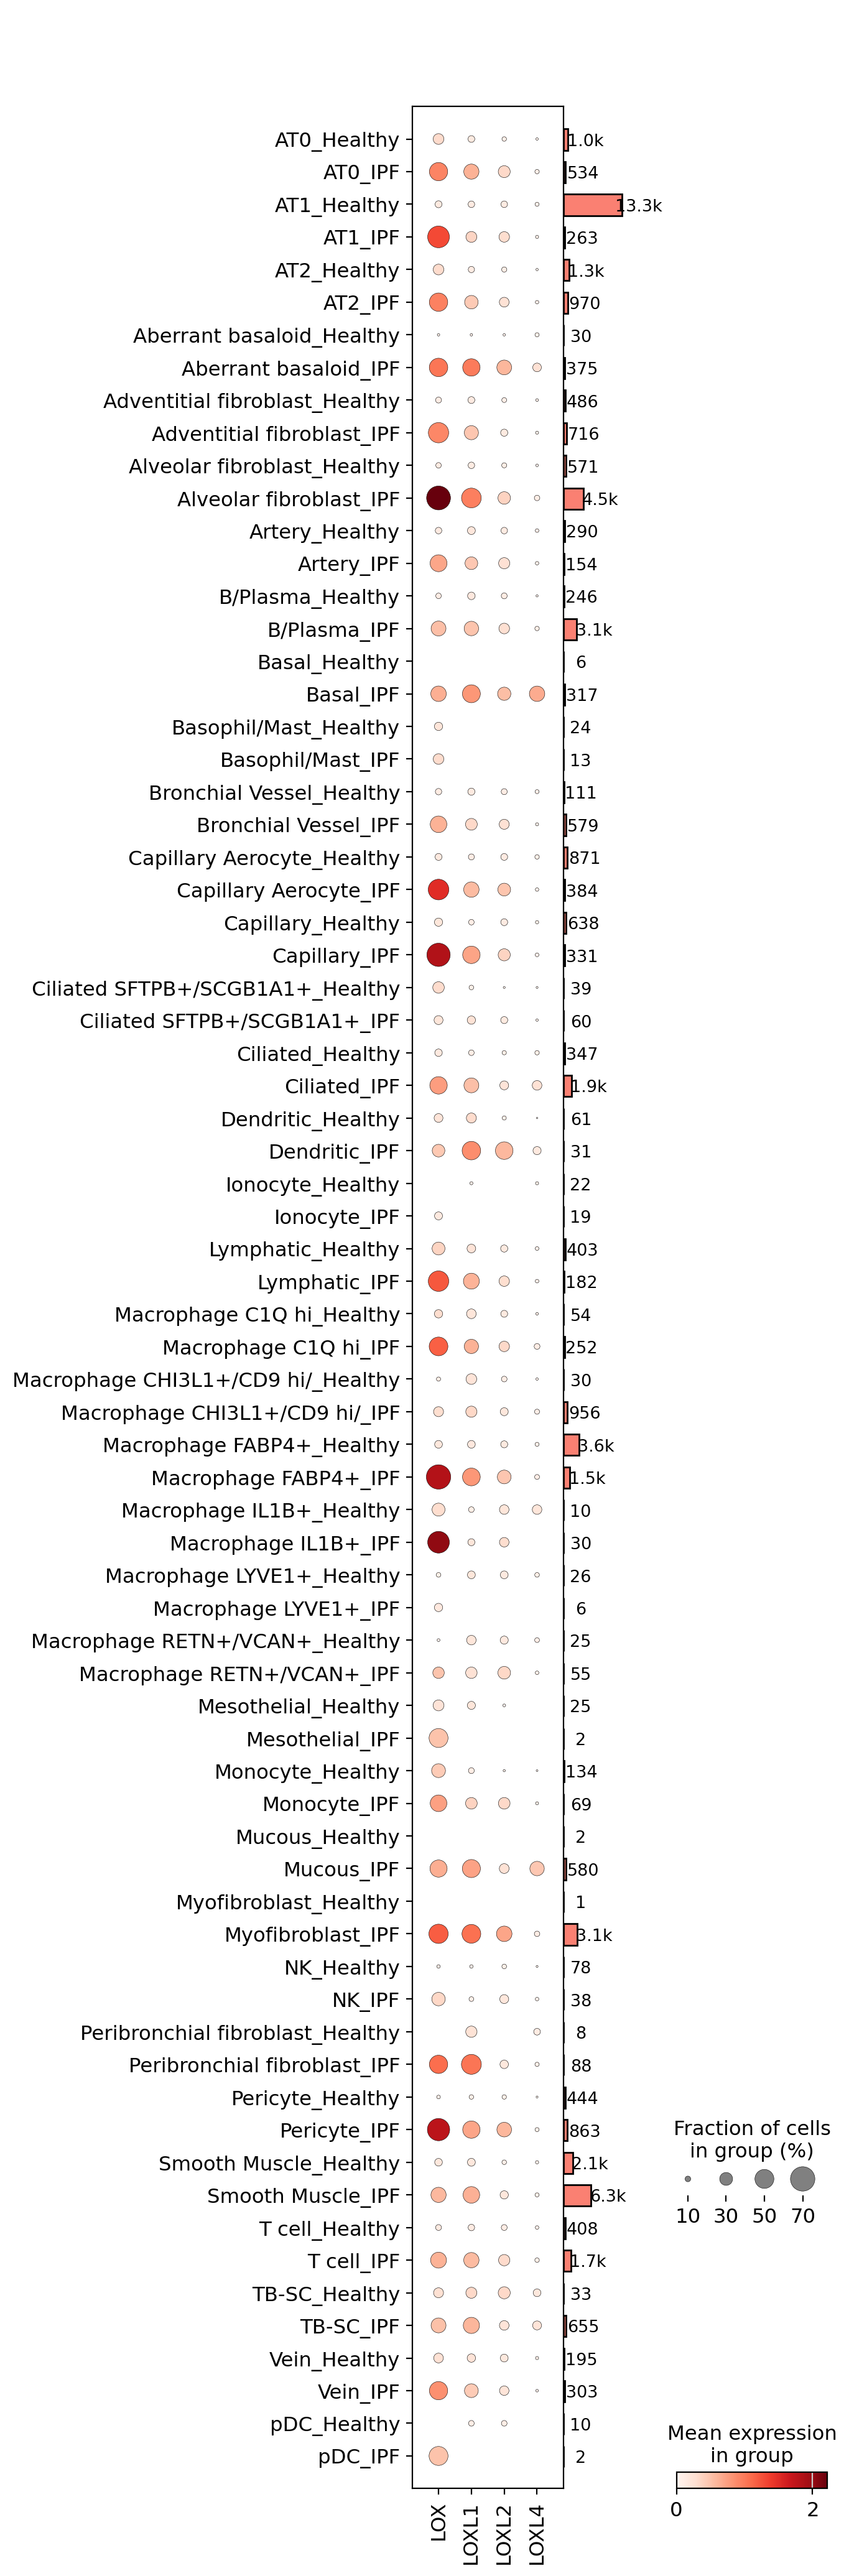

In [114]:
figx = sc.pl.dotplot(adata_vis, var_names=["LOX", "LOXL1","LOXL2","LOXL4"], groupby="treatment_sc_celltype",
              layer="counts",
              return_fig=True).add_totals( ).legend(width=2).show()

In [ ]:
#subset data to be used in mansucript figures.
subset = ["AT0", "AT1", "AT2", "Aberrant basaloid", "Basal", "Ciliated SFTPB+/SCGB1A1+", "Ciliated", "Mucous"]

In [123]:
subset_adata = adata_vis[adata_vis.obs["sc_celltype"].isin(subset)]

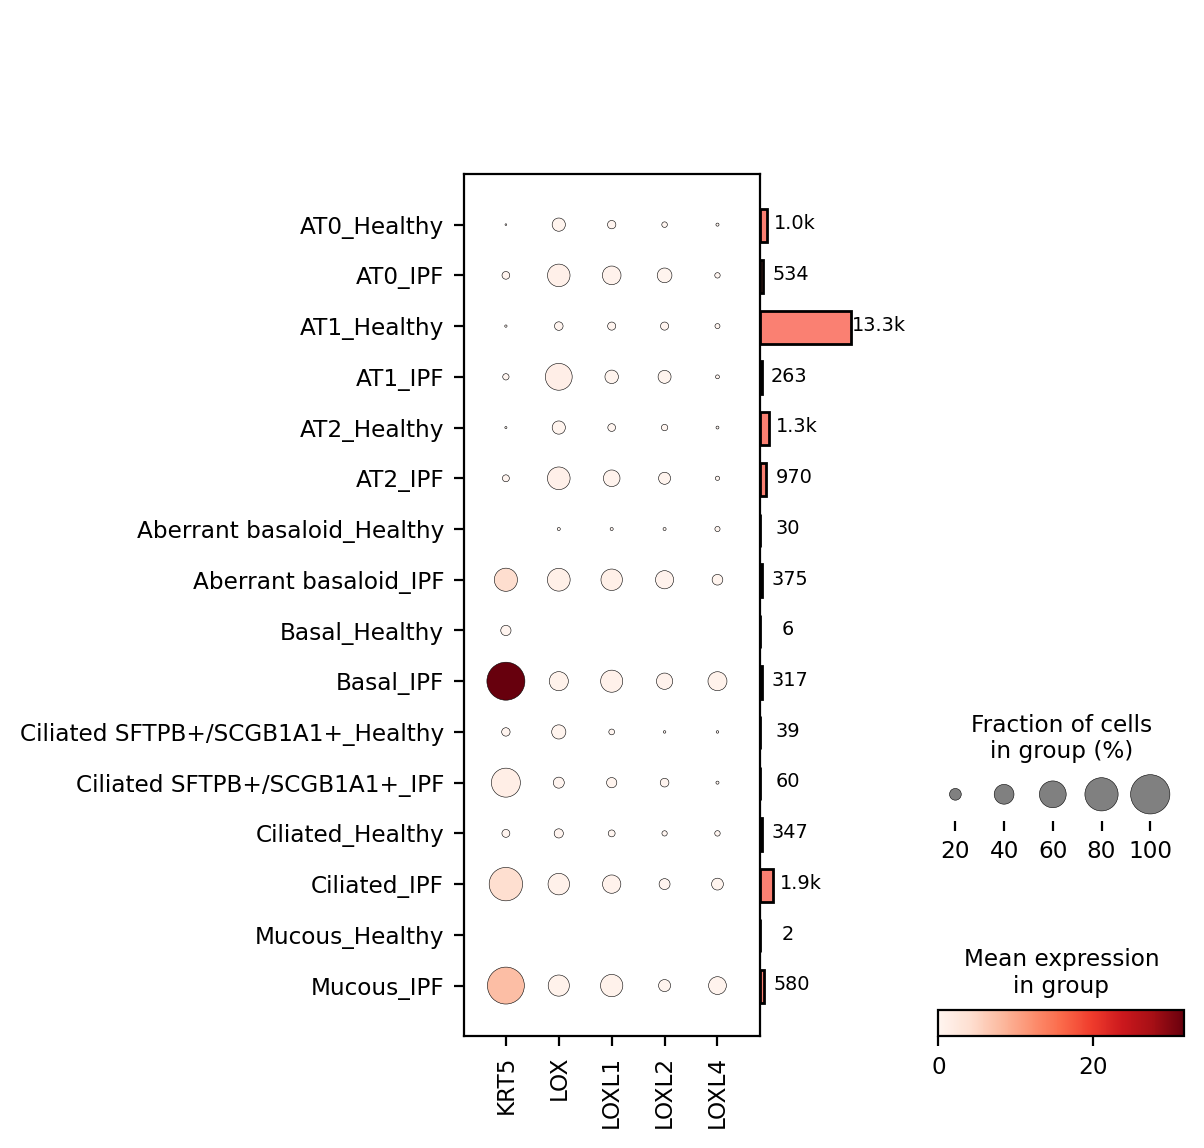

In [271]:
sc.pl.dotplot(subset_adata, var_names=["KRT5","LOX", "LOXL1","LOXL2","LOXL4"], groupby="treatment_sc_celltype",
              layer="counts",
              return_fig=True).add_totals( ).legend(width=2).show()